In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Esercitazione 11 _ Bonato Angela

Usando la libreria *Keras* di Python, l'esercitazione richiedeva di implementare reti neurali per il fitting di funzioni.

## Esercizio 11.1

L'esercizio consisteva in un fit lineare. Data $f(x)=2x+1$, ho applicato un rumore $\sigma$ Gaussiano e ho generato un dataset di cui il $90\%$ ($N_{train}$ punti) ha costituito il set di allenamento e la restante parte quello di validazione. Per valutare il ruolo giocato da $\sigma$, $N_{train}$ e $N_{epoch}$ (il numero di epoche per cui far allenare e testare la rete) nella bontà dei risultati ottenuti, ho condotto 8 analisi: ho generato 4 dataset caratterizzati a coppie dallo stesso valore di $\sigma$ o $N_{train}$ e, definita di volta in volta una rete costituita di un solo livello a singolo neurone, li ho fatti evolvere per due diversi valori di $N_{epoch}$.

In [50]:
#funzione target è 2x+1 ergo i parametri target sono
m=2
b=1

#genero 4 modelli (a,b,c,d) tc due a due hanno un parametro comune
#noise gaussiano
a_sigma=0.3
b_sigma=a_sigma
c_sigma=0.8
d_sigma=c_sigma

#genero dati di training
a_n_train=500
b_n_train=1000
c_n_train=a_n_train
d_n_train=b_n_train

np.random.seed(0)

a_x_train=np.random.uniform(-1, 1, a_n_train)
a_y_train=np.random.normal(m*a_x_train+b, a_sigma) #effettivi dati per il training

b_x_train=np.random.uniform(-1, 1, b_n_train)
b_y_train=np.random.normal(m*b_x_train+b, b_sigma)

c_x_train=np.random.uniform(-1, 1, c_n_train)
c_y_train=np.random.normal(m*c_x_train+b, c_sigma)

d_x_train=np.random.uniform(-1, 1, d_n_train)
d_y_train=np.random.normal(m*d_x_train+b, d_sigma)

#genero dati di validazione
a_x_valid=np.random.uniform(-1, 1, int(a_n_train/10))
a_y_valid=np.random.normal(m*a_x_valid+b, a_sigma) #effettivi dati per la validazione

b_x_valid=np.random.uniform(-1, 1, int(b_n_train/10))
b_y_valid=np.random.normal(m*b_x_valid+b, b_sigma)

c_x_valid=np.random.uniform(-1, 1, int(c_n_train/10))
c_y_valid=np.random.normal(m*c_x_valid+b, c_sigma)

d_x_valid=np.random.uniform(-1, 1, int(d_n_train/10))
d_y_valid=np.random.normal(m*d_x_valid+b, d_sigma)

#genero anche punti target (i.e., ideali)
a_y_target=m*a_x_valid+b
b_y_target=m*b_x_valid+b
c_y_target=m*c_x_valid+b
d_y_target=m*d_x_valid+b

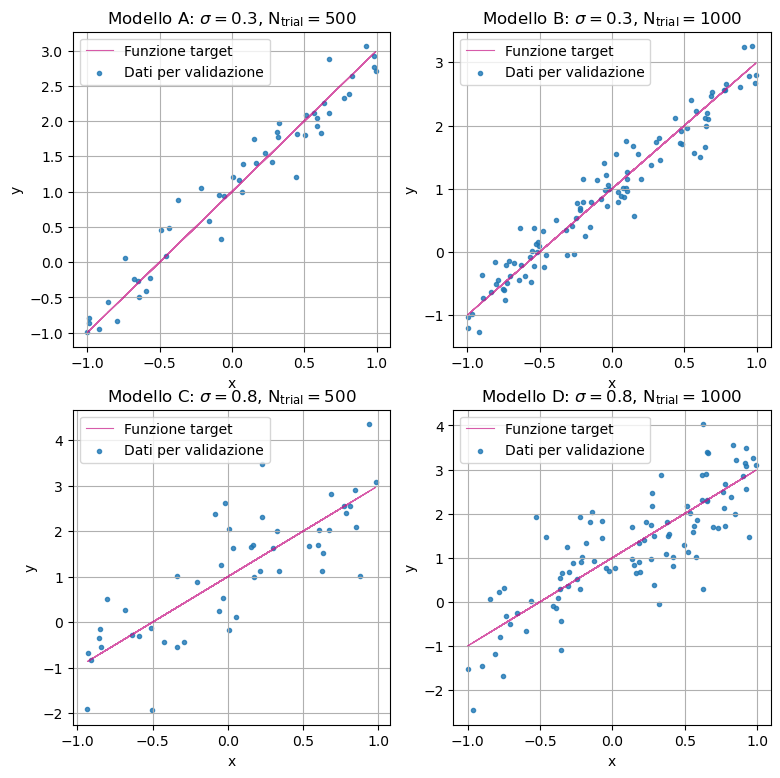

In [51]:
#plot con dati di validazione e training
dfig, dplt = plt.subplots(2, 2, figsize=(9, 9))

(dplt1, dplt2), (dplt3, dplt4) = dplt

dplt1.plot(a_x_valid, a_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt1.scatter(a_x_valid, a_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt1.set_xlabel('x')
dplt1.set_ylabel('y')
dplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
dplt1.legend()
dplt1.grid(True)

dplt2.plot(b_x_valid, b_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt2.scatter(b_x_valid, b_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt2.set_xlabel('x')
dplt2.set_ylabel('y')
dplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
dplt2.legend()
dplt2.grid(True)

dplt3.plot(c_x_valid, c_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt3.scatter(c_x_valid, c_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt3.set_xlabel('x')
dplt3.set_ylabel('y')
dplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
dplt3.legend()
dplt3.grid(True)

dplt4.plot(d_x_valid, d_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt4.scatter(d_x_valid, d_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt4.set_xlabel('x')
dplt4.set_ylabel('y')
dplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
dplt4.legend()
dplt4.grid(True)

plt.show()

### Analisi con $\mathrm{N_{epoch}}=30$

#### Modello A

In [52]:
#compilazione e fitting
af_model=tf.keras.Sequential()
af_model.add(Input(shape=(1,)))
af_model.add(Dense(1))
af_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
af_model.summary()

af_history=af_model.fit(x=a_x_train, y=a_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          verbose=0,
          validation_data=(a_x_valid, a_y_valid))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [53]:
#valutazione del modello A con il dataset di validazione e i dati di target
af_model.get_weights()

print('Modello A, 30 epoche, dataset validazione')
af_score=af_model.evaluate(a_x_valid, a_y_valid, batch_size=32, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

print('Modello A, 30 epoche, dataset target')
af_score=af_model.evaluate(a_x_valid, a_y_target, batch_size=32, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

Modello A, 30 epoche, dataset validazione
2/2 [==============================] - 0s 6ms/step - loss: 0.0737 - mse: 0.0737
Test loss: 0.07370579242706299
Test accuracy: 0.07370579242706299
Modello A, 30 epoche, dataset target
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017
Test loss: 0.0016531216679140925
Test accuracy: 0.0016531216679140925


#### Modello B

In [54]:
#compilazione e fitting
bf_model=tf.keras.Sequential()
bf_model.add(Input(shape=(1,)))
bf_model.add(Dense(1))
bf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
bf_model.summary()

bf_history=bf_model.fit(x=b_x_train, y=b_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          verbose=0,
          validation_data=(b_x_valid, b_y_valid))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
#valutazione del modello B con il dataset di validazione e i dati di target
bf_model.get_weights()

print('Modello B, 30 epoche, dataset validazione')
bf_score=bf_model.evaluate(b_x_valid, b_y_valid, batch_size=32, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

print('Modello B, 30 epoche, dataset target')
bf_score=bf_model.evaluate(b_x_valid, b_y_target, batch_size=32, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

Modello B, 30 epoche, dataset validazione
4/4 [==============================] - 0s 3ms/step - loss: 0.0777 - mse: 0.0777
Test loss: 0.07766718417406082
Test accuracy: 0.07766718417406082
Modello B, 30 epoche, dataset target
4/4 [==============================] - 0s 4ms/step - loss: 2.0211e-04 - mse: 2.0211e-04
Test loss: 0.00020210546790622175
Test accuracy: 0.00020210546790622175


#### Modello C

In [56]:
#compilazione e fitting
cf_model=tf.keras.Sequential()
cf_model.add(Input(shape=(1,)))
cf_model.add(Dense(1))
cf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
cf_model.summary()

cf_history=cf_model.fit(x=c_x_train, y=c_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          verbose=0,
          validation_data=(c_x_valid, c_y_valid))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [57]:
#valutazione del modello C con il dataset di validazione e i dati di target
cf_model.get_weights()

print('Modello C, 30 epoche, dataset validazione')
cf_score=bf_model.evaluate(c_x_valid, c_y_valid, batch_size=32, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

print('Modello C, 30 epoche, dataset target')
cf_score=cf_model.evaluate(c_x_valid, c_y_target, batch_size=32, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

Modello C, 30 epoche, dataset validazione
2/2 [==============================] - 0s 5ms/step - loss: 0.6587 - mse: 0.6587
Test loss: 0.6586538553237915
Test accuracy: 0.6586538553237915
Modello C, 30 epoche, dataset target
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - mse: 0.0107
Test loss: 0.010700441896915436
Test accuracy: 0.010700441896915436


#### Modello D

In [58]:
#compilazione e fitting
df_model=tf.keras.Sequential()
df_model.add(Input(shape=(1,)))
df_model.add(Dense(1))
df_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
df_model.summary()

df_history=df_model.fit(x=d_x_train, y=d_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          verbose=0,
          validation_data=(d_x_valid, d_y_valid))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [59]:
#valutazione del modello D con il dataset di validazione e i dati di target
df_model.get_weights()

print('Modello D, 30 epoche, dataset validazione')
df_score=bf_model.evaluate(d_x_valid, d_y_valid, batch_size=32, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

print('Modello D, 30 epoche, dataset target')
df_score=cf_model.evaluate(d_x_valid, d_y_target, batch_size=32, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

Modello D, 30 epoche, dataset validazione
4/4 [==============================] - 0s 5ms/step - loss: 0.5467 - mse: 0.5467
Test loss: 0.5466920733451843
Test accuracy: 0.5466920733451843
Modello D, 30 epoche, dataset target
4/4 [==============================] - 0s 5ms/step - loss: 0.0106 - mse: 0.0106
Test loss: 0.010615765117108822
Test accuracy: 0.010615765117108822


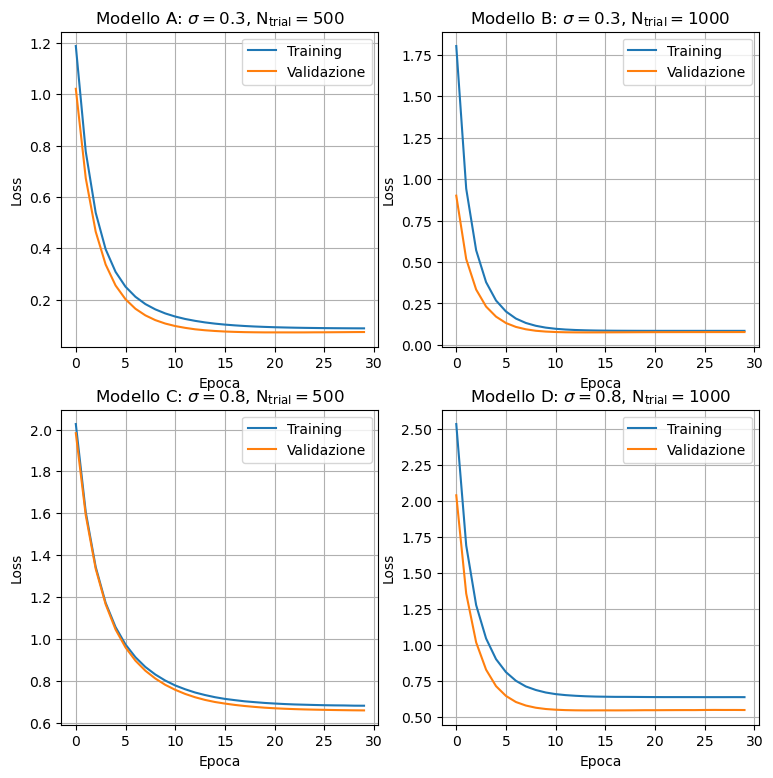

In [60]:
#plot dei valori della loss function di training vs validazione
lffig, lfplt = plt.subplots(2, 2, figsize=(9, 9))

(lfplt1, lfplt2), (lfplt3, lfplt4) = lfplt

lfplt1.plot(af_history.history['loss'])
lfplt1.plot(af_history.history['val_loss'])
lfplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
lfplt1.set_ylabel('Loss')
lfplt1.set_xlabel('Epoca')
lfplt1.legend(['Training', 'Validazione'], loc='best')
lfplt1.grid(True)

lfplt2.plot(bf_history.history['loss'])
lfplt2.plot(bf_history.history['val_loss'])
lfplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
lfplt2.set_ylabel('Loss')
lfplt2.set_xlabel('Epoca')
lfplt2.legend(['Training', 'Validazione'], loc='best')
lfplt2.grid(True)

lfplt3.plot(cf_history.history['loss'])
lfplt3.plot(cf_history.history['val_loss'])
lfplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
lfplt3.set_ylabel('Loss')
lfplt3.set_xlabel('Epoca')
lfplt3.legend(['Training', 'Validazione'], loc='best')
lfplt3.grid(True)

lfplt4.plot(df_history.history['loss'])
lfplt4.plot(df_history.history['val_loss'])
lfplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
lfplt4.set_ylabel('Loss')
lfplt4.set_xlabel('Epoca')
lfplt4.legend(['Training', 'Validazione'], loc='best')
lfplt4.grid(True)

plt.show()

### Analisi con $\mathrm{N_{epoch}}=80$

#### Modello A

In [61]:
#compilazione e fitting
as_model=tf.keras.Sequential()
as_model.add(Input(shape=(1,)))
as_model.add(Dense(1))
as_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
as_model.summary()

as_history=as_model.fit(x=a_x_train, y=a_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          verbose=0,
          validation_data=(a_x_valid, a_y_valid))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [62]:
#valutazione del modello A con il dataset di validazione e i dati di target
as_model.get_weights()

print('Modello A, 80 epoche, dataset validazione')
as_score=as_model.evaluate(a_x_valid, a_y_valid, batch_size=32, verbose=1)
print('Test loss:', as_score[0])
print('Test accuracy:', as_score[1])

print('Modello A, 30 epoche, dataset target')
as_score=as_model.evaluate(a_x_valid, a_y_target, batch_size=32, verbose=1)
print('Test loss:', as_score[0])
print('Test accuracy:', as_score[1])

Modello A, 80 epoche, dataset validazione
2/2 [==============================] - 0s 6ms/step - loss: 0.0766 - mse: 0.0766
Test loss: 0.07657241076231003
Test accuracy: 0.07657241076231003
Modello A, 30 epoche, dataset target
2/2 [==============================] - 0s 5ms/step - loss: 8.8465e-04 - mse: 8.8465e-04
Test loss: 0.0008846494602039456
Test accuracy: 0.0008846494602039456


#### Modello B

In [63]:
#compilazione e fitting
bs_model=tf.keras.Sequential()
bs_model.add(Input(shape=(1,)))
bs_model.add(Dense(1))
bs_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
bs_model.summary()

bs_history=bs_model.fit(x=b_x_train, y=b_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          verbose=0,
          validation_data=(b_x_valid, b_y_valid))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [64]:
#valutazione del modello B con il dataset di validazione e i dati di target
bs_model.get_weights()

print('Modello B, 80 epoche, dataset validazione')
bs_score=bf_model.evaluate(b_x_valid, b_y_valid, batch_size=32, verbose=1)
print('Test loss:', bs_score[0])
print('Test accuracy:', bs_score[1])

print('Modello B, 80 epoche, dataset target')
bs_score=bf_model.evaluate(b_x_valid, b_y_target, batch_size=32, verbose=1)
print('Test loss:', bs_score[0])
print('Test accuracy:', bs_score[1])

Modello B, 80 epoche, dataset validazione
4/4 [==============================] - 0s 11ms/step - loss: 0.0777 - mse: 0.0777
Test loss: 0.07766718417406082
Test accuracy: 0.07766718417406082
Modello B, 80 epoche, dataset target
4/4 [==============================] - 0s 11ms/step - loss: 2.0211e-04 - mse: 2.0211e-04
Test loss: 0.00020210546790622175
Test accuracy: 0.00020210546790622175


#### Modello C

In [65]:
#compilazione e fitting
cs_model=tf.keras.Sequential()
cs_model.add(Input(shape=(1,)))
cs_model.add(Dense(1))
cs_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
cs_model.summary()

cs_history=cs_model.fit(x=c_x_train, y=c_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          verbose=0,
          validation_data=(c_x_valid, c_y_valid))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [66]:
#valutazione del modello C con il dataset di validazione e i dati di target
cs_model.get_weights()

print('Modello C, 80 epoche, dataset validazione')
cs_score=bf_model.evaluate(c_x_valid, c_y_valid, batch_size=32, verbose=1)
print('Test loss:', cs_score[0])
print('Test accuracy:', cs_score[1])

print('Modello C, 80 epoche, dataset target')
cs_score=cf_model.evaluate(c_x_valid, c_y_target, batch_size=32, verbose=1)
print('Test loss:', cs_score[0])
print('Test accuracy:', cs_score[1])

Modello C, 80 epoche, dataset validazione
2/2 [==============================] - 0s 5ms/step - loss: 0.6587 - mse: 0.6587
Test loss: 0.6586538553237915
Test accuracy: 0.6586538553237915
Modello C, 80 epoche, dataset target
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - mse: 0.0107
Test loss: 0.010700441896915436
Test accuracy: 0.010700441896915436


#### Modello D

In [67]:
#compilazione e fitting
ds_model=tf.keras.Sequential()
ds_model.add(Input(shape=(1,)))
ds_model.add(Dense(1))
ds_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
ds_model.summary()

ds_history=ds_model.fit(x=d_x_train, y=d_y_train, 
          batch_size=32, epochs=80,
          shuffle=True,
          verbose=0,
          validation_data=(d_x_valid, d_y_valid))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
#valutazione del modello D con il dataset di validazione e i dati di target
ds_model.get_weights()

print('Modello D, 80 epoche, dataset validazione')
ds_score=ds_model.evaluate(d_x_valid, d_y_valid, batch_size=32, verbose=1)
print('Test loss:', ds_score[0])
print('Test accuracy:', ds_score[1])

print('Modello D, 80 epoche, dataset target')
ds_score=ds_model.evaluate(d_x_valid, d_y_target, batch_size=32, verbose=1)
print('Test loss:', ds_score[0])
print('Test accuracy:', ds_score[1])

Modello D, 80 epoche, dataset validazione
4/4 [==============================] - 0s 4ms/step - loss: 0.5476 - mse: 0.5476
Test loss: 0.5475738048553467
Test accuracy: 0.5475738048553467
Modello D, 80 epoche, dataset target
4/4 [==============================] - 0s 6ms/step - loss: 1.3143e-05 - mse: 1.3143e-05
Test loss: 1.3143469914211892e-05
Test accuracy: 1.3143469914211892e-05


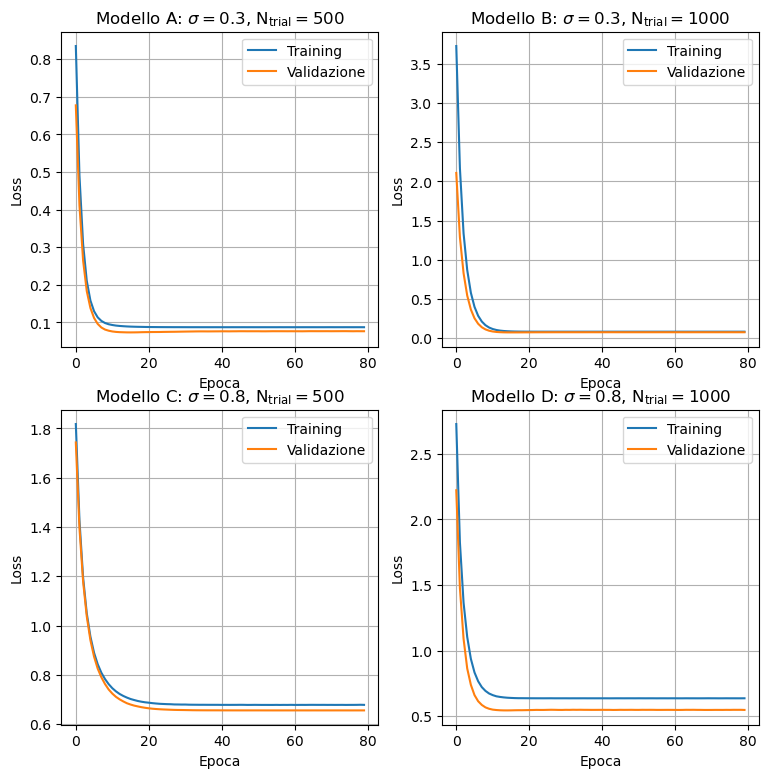

In [69]:
#plot dei valori della loss function di training vs validazione
lsfig, lsplt = plt.subplots(2, 2, figsize=(9, 9))

(lsplt1, lsplt2), (lsplt3, lsplt4) = lsplt

lsplt1.plot(as_history.history['loss'])
lsplt1.plot(as_history.history['val_loss'])
lsplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
lsplt1.set_ylabel('Loss')
lsplt1.set_xlabel('Epoca')
lsplt1.legend(['Training', 'Validazione'], loc='best')
lsplt1.grid(True)

lsplt2.plot(bs_history.history['loss'])
lsplt2.plot(bs_history.history['val_loss'])
lsplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
lsplt2.set_ylabel('Loss')
lsplt2.set_xlabel('Epoca')
lsplt2.legend(['Training', 'Validazione'], loc='best')
lsplt2.grid(True)

lsplt3.plot(cs_history.history['loss'])
lsplt3.plot(cs_history.history['val_loss'])
lsplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
lsplt3.set_ylabel('Loss')
lsplt3.set_xlabel('Epoca')
lsplt3.legend(['Training', 'Validazione'], loc='best')
lsplt3.grid(True)

lsplt4.plot(ds_history.history['loss'])
lsplt4.plot(ds_history.history['val_loss'])
lsplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
lsplt4.set_ylabel('Loss')
lsplt4.set_xlabel('Epoca')
lsplt4.legend(['Training', 'Validazione'], loc='best')
lsplt4.grid(True)

plt.show()

### Risultati a confronto

4/4 [==============================] - 0s 2ms/step


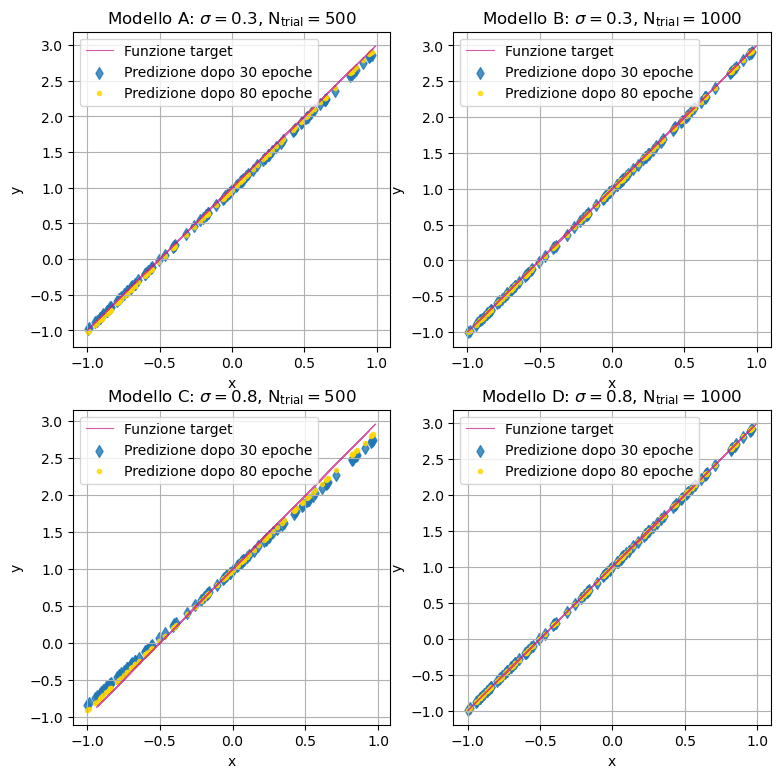

In [70]:
#risultati per ogni modello analizzato
x_pred=np.random.uniform(-1, 1, 100)

af_y_pred=af_model.predict(x_pred)
as_y_pred=as_model.predict(x_pred)

bf_y_pred=bf_model.predict(x_pred)
bs_y_pred=bs_model.predict(x_pred)

cf_y_pred=cf_model.predict(x_pred)
cs_y_pred=cs_model.predict(x_pred)

df_y_pred=df_model.predict(x_pred)
ds_y_pred=ds_model.predict(x_pred)

rfig, rplt = plt.subplots(2, 2, figsize=(9, 9))

(rplt1, rplt2), (rplt3, rplt4) = rplt

rplt1.plot(a_x_valid, a_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt1.scatter(x_pred, af_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt1.scatter(x_pred, as_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt1.set_xlabel('x')
rplt1.set_ylabel('y')
rplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
rplt1.legend()
rplt1.grid(True)

rplt2.plot(b_x_valid, b_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt2.scatter(x_pred, bf_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt2.scatter(x_pred, bs_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt2.set_xlabel('x')
rplt2.set_ylabel('y')
rplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
rplt2.legend()
rplt2.grid(True)

rplt3.plot(c_x_valid, c_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt3.scatter(x_pred, cf_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt3.scatter(x_pred, cs_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt3.set_xlabel('x')
rplt3.set_ylabel('y')
rplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
rplt3.legend()
rplt3.grid(True)

rplt4.plot(d_x_valid, d_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
rplt4.scatter(x_pred, df_y_pred, label='Predizione dopo 30 epoche', marker='d', alpha=0.8)
rplt4.scatter(x_pred, ds_y_pred, label='Predizione dopo 80 epoche', marker='.', color='gold', alpha=0.8)
rplt4.set_xlabel('x')
rplt4.set_ylabel('y')
rplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
rplt4.legend()
rplt4.grid(True)

plt.show()

I risultati sotto mostrati suggeriscono che la differenza più evidente la faccia $N_{train}$: anche quando $\sigma$ è maggiore, aumentando la dimensione del dataset di allenamento le predizioni sono accurate. 

Agire su $N_{epoch}$ ha un impatto più evidente nel caso di $N_{train}$ minore, probabilmente perchè con molti dati di training i modelli convergono bene già dopo poche epoche senza aver bisogno di aumentare l'allenamento. L'andamento dell'errore di validazione quando $N_{epoch}$ è maggiore mostra, in 3 casi su 4, un leggero avallamento che indica la presenza di un minimo. Questo suggerisce che in questo caso i modelli stanno andando in overfitting, a riprova del fatto che il numero di epoche ottimale è più basso di quello scelto per l'analisi.

## Esercizio 11.2

A questo punto era richiesta una rete neurale in grado di fittare il polinomio $f(x)=4-3x-2x^2+3x^3$ per $x\in[-1,1]$ e di testare le sue capacità predittive al di fuori di questo range. Innanzitutto, ho generato i dati di allenamento e validazione (sempre rsipettivamente il $90\%$ e il $10\%$ dei punti totali) applicando un rumore Gaussiano ai valori assunti dalla funzione per $x\in[-1,1]$. 

Poi, dopo aver variato nel corso di diversi tentativi il numero di layer e di neuroni nonchè le funzioni di attivazione, ho costruito una rete con due layer nascosti da tre neuroni l'uno attivati dalla funzione $tanh$ e un layer di output con un neurone ad attivazione $relu$. Ho eseguito la fase di allenamento, cercando di non impostare un numero di epoche eccessivo come fatto nell'esercizio precedente, e ho testato le capacità predittive della rete.

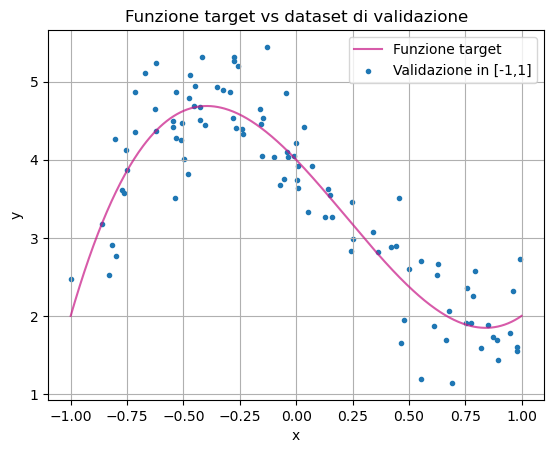

In [71]:
#funzione target è 3x^3-2x^2-3x+4 ergo i parametri target sono
pol_a=3
pol_b=-2
pol_c=-3
pol_d=4

#genero un modello con noise gaussiano
sigma=0.5

#genero dati di training in [-1,1]
n_train=1000
np.random.seed(0)
x_train=np.random.uniform(-1, 1, n_train)
y_train=np.random.normal(pol_a*(x_train**3)+pol_b*(x_train**2)+pol_c*x_train+pol_d, sigma) #effettivi dati per il training

#genero dati di validazione in [-1,1]
in_x_valid=np.random.uniform(-1, 1, int(n_train/10))
in_y_valid=np.random.normal(pol_a*(in_x_valid**3)+pol_b*(in_x_valid**2)+pol_c*in_x_valid+pol_d, sigma) #effettivi dati per la validazione

#genero anche punti target (i.e., ideali)
x_target=np.linspace(-1, 1, 400)
y_target=pol_a*(x_target**3)+pol_b*(x_target**2)+pol_c*x_target+pol_d

#plot
plt.plot(x_target, y_target, color='mediumvioletred', label='Funzione target', alpha=0.7)
plt.scatter(in_x_valid, in_y_valid, label='Validazione in [-1,1]', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funzione target vs dataset di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
#compilazione e fitting con il dataset di validazione
pol_model=tf.keras.Sequential()
pol_model.add(Dense(3, input_dim=1, activation='tanh'))
pol_model.add(Dense(3, input_dim=1, activation='tanh'))
pol_model.add(Dense(1, activation='relu'))
pol_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
pol_model.summary()

in_history=pol_model.fit(x=x_train, y=y_train, 
          batch_size=30, epochs=150,
          shuffle=True,
          verbose=0,
          validation_data=(in_x_valid, in_y_valid))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 3)                 6         
                                                                 
 dense_27 (Dense)            (None, 3)                 12        
                                                                 
 dense_28 (Dense)            (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 3ms/step


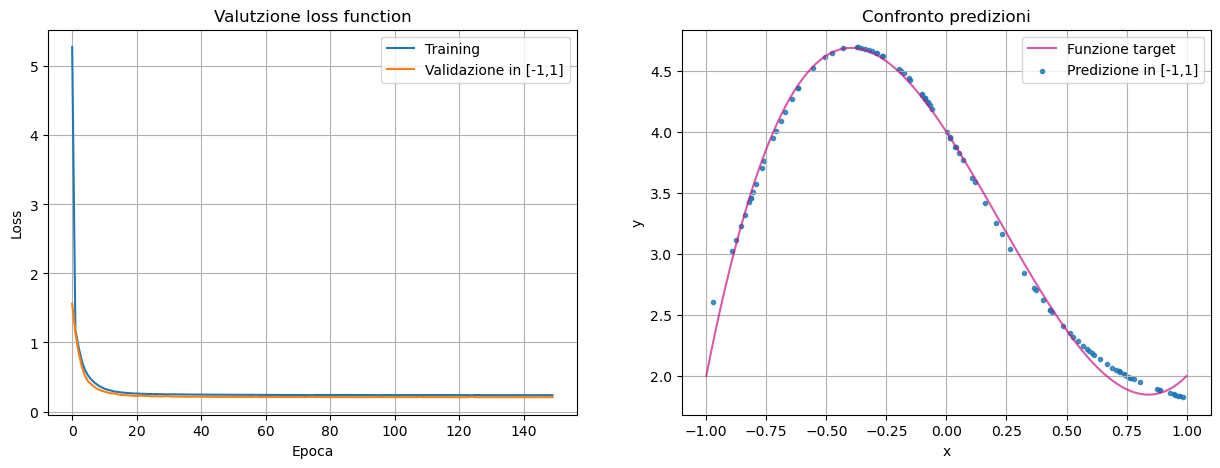

In [73]:
#risultati nel range di allenamento
in_x_pred=np.random.uniform(-1, 1, 100)
in_y_pred=pol_model.predict(in_x_pred)

rifig ,(riplt1, riplt2) = plt.subplots(1, 2, figsize=(15, 5))

riplt1.plot(in_history.history['loss'])
riplt1.plot(in_history.history['val_loss'])
riplt1.set_title('Valutzione loss function')
riplt1.set_ylabel('Loss')
riplt1.set_xlabel('Epoca')
riplt1.legend(['Training', 'Validazione in [-1,1]'], loc='best')
riplt1.grid(True)

riplt2.plot(x_target, y_target, color='mediumvioletred', label='Funzione target', alpha=0.7)
riplt2.scatter(in_x_pred, in_y_pred, label='Predizione in [-1,1]', marker='.', alpha=0.8)
riplt2.set_xlabel('x')
riplt2.set_ylabel('y')
riplt2.set_title('Confronto predizioni')
riplt2.legend(loc='upper right')
riplt2.grid(True)

plt.show()

4/4 [==============================] - 0s 5ms/step


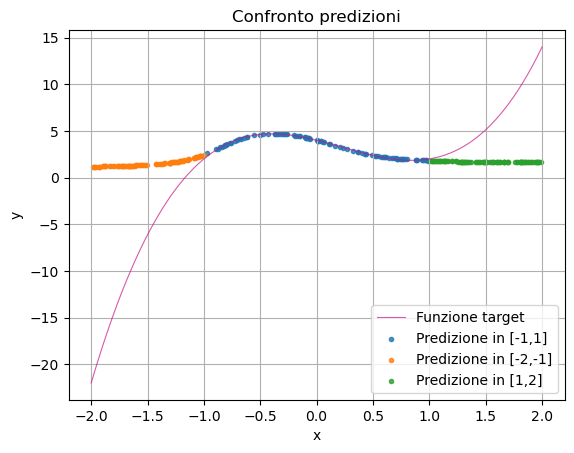

In [75]:
#provo a vedere cosa succede fuori dal range di allenamento e validazione
out1_x_pred=np.random.uniform(-2, -1, 100)
out1_y_pred=pol_model.predict(out1_x_pred)

out2_x_pred=np.random.uniform(1, 2, 100)
out2_y_pred=pol_model.predict(out2_x_pred)

x_fit=np.linspace(-2, 2, 400)
y_fit=pol_a*(x_fit**3)+pol_b*(x_fit**2)+pol_c*x_fit+pol_d

plt.plot(x_fit, y_fit, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
plt.scatter(in_x_pred, in_y_pred, label='Predizione in [-1,1]', marker='.', alpha=0.8)
plt.scatter(out1_x_pred, out1_y_pred, label='Predizione in [-2,-1]', marker='.', alpha=0.8)
plt.scatter(out2_x_pred, out2_y_pred, label='Predizione in [1,2]', marker='.', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confronto predizioni')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

L'andamento degli errori durante l'allenamento e la validazione della rete non suggeriscono overfitting, tuttavia le predizioni all'interno dell'intervallo di training risultano piuttosto accurate. Una volta fuori da questo range sia in positivo che in negativo, però, il modello performa molto male, come ci si poteva aspettare.

## Esercizio 11.3

Infine, era data la funzione a due variabili $f(x,y)=\sin(x^2+y^2)$ da fittare per $x,y\in[-3/2,3/2]$. Essendo un problema nettamente più complicato del precedente, ho generato dataset di training e validazione, in maniera analoga a quanto fatto precedentemente, di dimensioni ben maggiori, ho usato una rete più profonda e ho aumentato anche $N_{epoch}$. 

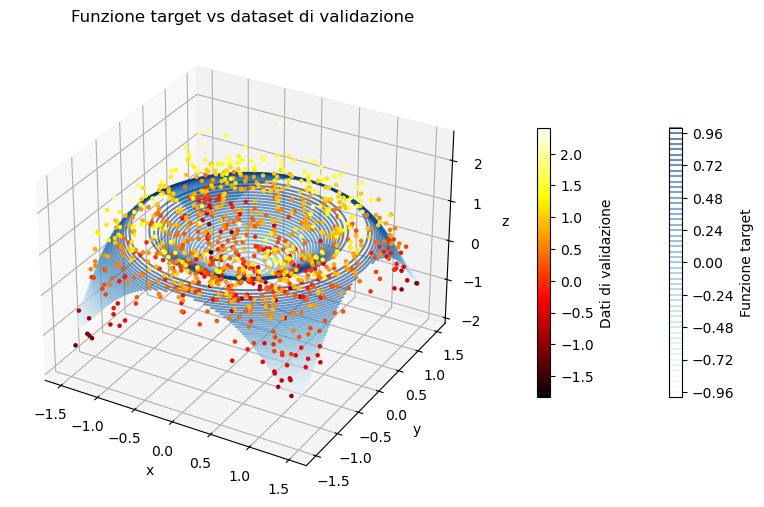

In [76]:
#funzione target è sin(x^2+y^2) ergo i parametri target sono

#genero un modello con noise gaussiano
s_sigma=0.5

#genero dati di training e validazione con x e y in [-1.5,1.5]
s_n_train=10000
np.random.seed(0)

s_x_train=np.random.uniform(-1.5, 1.5, s_n_train)
s_y_train=np.random.uniform(-1.5, 1.5, s_n_train)
s_z_train=np.random.normal(np.sin(s_x_train**2 + s_y_train**2), s_sigma) #effettivi dati per il training

s_x_valid=np.random.uniform(-1.5, 1.5, int(s_n_train/10))
s_y_valid=np.random.uniform(-1.5, 1.5, int(s_n_train/10))
s_z_valid=np.random.normal(np.sin(s_x_valid**2 + s_y_valid**2), s_sigma) #effettivi dati per la validazione

#plot
#genero punti target (i.e., ideali)
s_x_target=np.linspace(-1.5, 1.5, 1000)
s_y_target=np.linspace(-1.5, 1.5, 1000)
X, Y=np.meshgrid(s_x_target, s_y_target)
Z=np.sin(X**2 + Y**2)

fig=plt.figure(figsize=(10, 7))
ax=fig.add_subplot(111, projection='3d')
c=ax.contour3D(X, Y, Z, 50, cmap='Blues', alpha=0.6)
s=ax.scatter(s_x_valid, s_y_valid, s_z_valid, marker='.', c=s_z_valid, cmap='hot', alpha=1)
plt.colorbar(c, ax=ax, pad=0.05, label='Funzione target', shrink=0.5)
plt.colorbar(s, ax=ax, pad=0.1, label='Dati di validazione', shrink=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione target vs dataset di validazione')
plt.show()

In [77]:
#compilazione e fitting con il dataset di validazione
s_train=np.column_stack((s_x_train, s_y_train))
s_valid=np.column_stack((s_x_valid, s_y_valid))

s_model=tf.keras.Sequential()
s_model.add(Dense(10, input_shape=(2,), activation='tanh'))
s_model.add(Dense(10, activation='tanh'))
s_model.add(Dense(10, activation='tanh'))
s_model.add(Dense(1, activation='relu'))
s_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
s_model.summary()

s_history=s_model.fit(x=s_train, y=s_z_train,
          batch_size=25, epochs=200,
          shuffle=True,
          verbose=0,
          validation_data=(s_valid, s_z_valid))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                30        
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


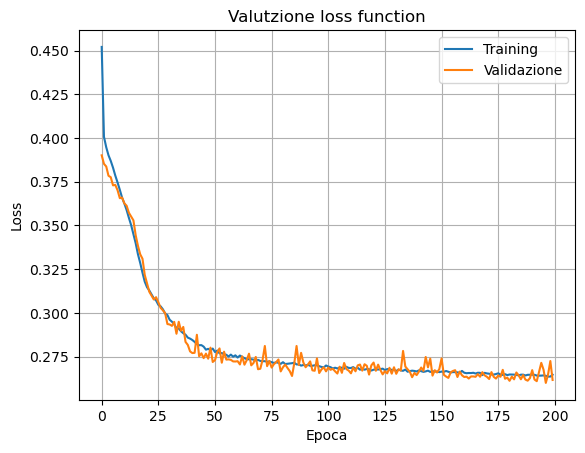

In [78]:
plt.plot(s_history.history['loss'])
plt.plot(s_history.history['val_loss'])
plt.title('Valutzione loss function')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validazione'], loc='best')
plt.grid(True)
plt.show()

16/16 [==============================] - 0s 4ms/step


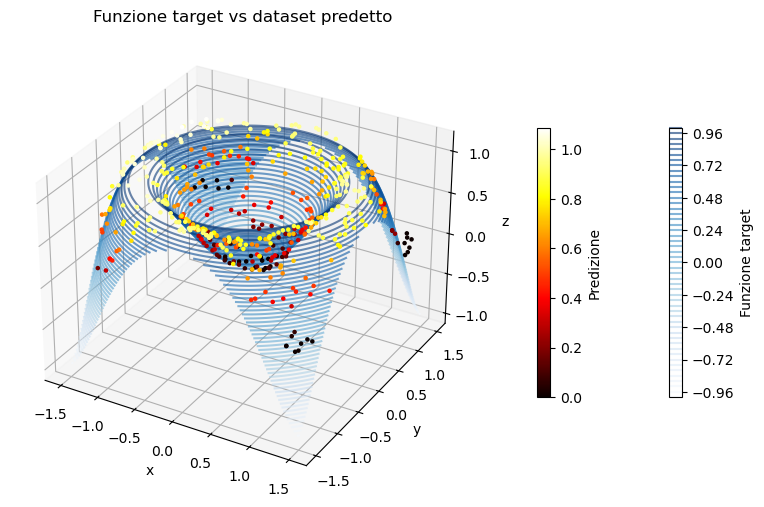

In [79]:
#plot predizione
s_x_pred=np.random.uniform(-1.5, 1.5, 500)
s_y_pred=np.random.uniform(-1.5, 1.5, 500)
s_z_pred=s_model.predict(np.column_stack((s_x_pred, s_y_pred)))

fig=plt.figure(figsize=(10, 7))
ax=fig.add_subplot(111, projection='3d')
c=ax.contour3D(X, Y, Z, 50, cmap='Blues', alpha=0.6)
s=ax.scatter(s_x_pred, s_y_pred, s_z_pred, marker='.', c=s_z_pred, cmap='hot', alpha=1)
plt.colorbar(c, ax=ax, pad=0.05, label='Funzione target', shrink=0.5)
plt.colorbar(s, ax=ax, pad=0.1, label='Predizione', shrink=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione target vs dataset predetto')
plt.show()

A giudicare dai risultati, l'aumento delle risorse pare aver ripagato. L'andamento dell'errore di allenamento è più difficile da giudicare rispetto a quelli visti prima, ma in media non presenta minimi e dunque non sembra suggerire la presenza di overfitting.